In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime



In [123]:
system_names = ['rossler','rabinovich_fabrikant','lorentz','chua']
system_names = [system + '1d' for system in system_names]


time_start = datetime(2020, 7, 25, 18) 
result_file0 = './result_attention0.csv' 
df = pd.read_csv(result_file0, index_col = 'datetime')
df.index = pd.DatetimeIndex(df.index)
df = df[df.index > time_start]
set(df['model_name'])

{'ESN',
 'ESN-ATTN',
 'RBFLN',
 'RBFLN-RE-echostate',
 'RBFLN-RE-transform',
 'RBFN',
 'VAR'}

# mse v.s. embedding dimension

rossler1d


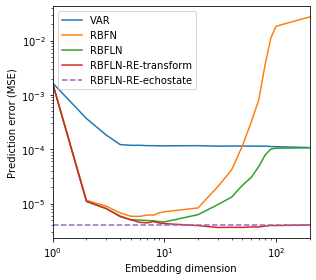

rabinovich_fabrikant1d


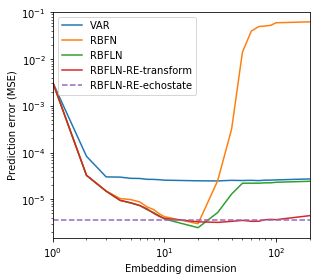

lorentz1d


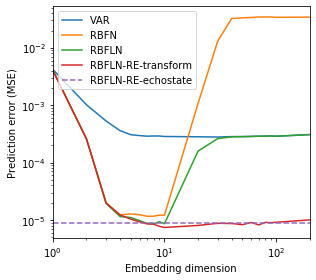

chua1d


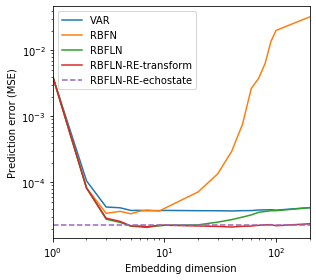

In [126]:
for system_name in system_names:
    print(system_name)
    average = pd.DataFrame()
    for i in range(10):
        result_file = './result_attention' +str(i) + '.csv' 
        df = pd.read_csv(result_file, index_col = 'datetime')
        df.index = pd.DatetimeIndex(df.index)
        df = df[df.index > time_start]

        result = df[df['system_name'].isin([system_name]) & df['horizon'].isin([1])]


        final = None
        for w in set(result['n_history']):

            temp = result.loc[result['n_history'] == w, ['model_name', 'mse', 'n_history']].groupby('model_name').min().reset_index()

            final = temp if final is None else final.append(temp, ignore_index=True)

        average = average.append(final)
        
    fig, ax = plt.subplots(figsize=(4.5,4))
    models1 = [ 'VAR', 'RBFN', 'RBFLN', 'RBFLN-RE-transform']
    models2 = ['RBFLN-RE-echostate']
    
    for name in models1:
        average.loc[average['model_name'] == name].groupby('n_history').mean().sort_values(by='n_history').plot(ax = ax)

    for name in models2:
        esn = average.loc[average['model_name'] == name].groupby('n_history').mean().mean()
        plt.plot([1,200], [esn,esn], '--', label=name)

    plt.legend(labels= models1+models2, loc='upper left')
    ax.set_yscale("log")
    ax.set_xscale("log")
    plt.xlabel('Embedding dimension')
    plt.ylabel('Prediction error (MSE)')
    plt.tight_layout()
    # plt.savefig('../attention_'+system_name+'_mse_window'+datetime.now().strftime('_%Y_%m_%d_%H_%M')+'.pdf')
    plt.savefig('../attention_'+system_name+'_mse_window.pdf')
    plt.show()
